In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ag-news-classification-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F612351%2F1095715%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240206%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240206T152724Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D42184c0d3925f435909a2a2b6ea0b63217525b7727413c3af7249444c7bac342710b7a9e34661445cb71221935da93a1a2ef049fa2b18f257f75b3843f9c9bcf553c70692fe1a98186f88dd2e6e0f71b5622073cbbaefa2f71d897cde832146be636845a2ec6ef6987b366b35e3734adfcd603e52b3171d7ff5c83d28f4e9c328711e38753565e6e037bb899609b7c7bb27e955be7ea18b835c28e09e71d2f07b304a59bc0e9cdf0250f102eb789cb7fdef790b4f52ecc8b776b531805c3d45f9e298e3a2059b991d99af5178912df5c37c4379e29ead2e340a379c3f00c3295c9562a89e335669fc4d8fb1081f0527af8a867fc3ac29c5ee15d1b46563310dc'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 11949309 bytes downloaded
Downloaded and uncompressed: ag-news-classification-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ag-news-classification-dataset/train.csv
/kaggle/input/ag-news-classification-dataset/test.csv


Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/kaggle/input/ag-news-classification-dataset/train.csv')
data

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


Data Visualization

In [ ]:
data.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

In [ ]:
data['Title'].isnull().sum()

0

In [ ]:
data['Description'].isnull().sum()

0

In [ ]:
data['Class Index'].value_counts()

3    30000
4    30000
2    30000
1    30000
Name: Class Index, dtype: int64

<Axes: >

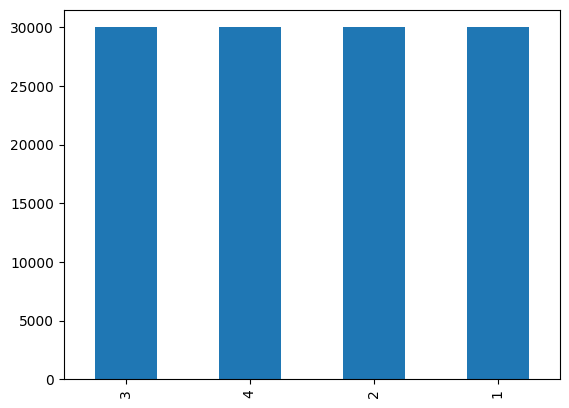

In [ ]:
data['Class Index'].value_counts().plot(kind='bar')

Text Preprocessing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Data Cleansing:

In [ ]:
import re
import string

def clean_text(text ):
    text =''.join(word for word in text if word not in string.punctuation)
    text1 = ''.join(w.lower() for w in text if not w.isdigit())
    return text1

Tokenization, Lemmatization

In [ ]:
# Lemmatization of text data
def lemmatize_text(text):
    wordlist = []
    lemmatizer = WordNetLemmatizer()
    # Sentence tokenization
    sentences = nltk.sent_tokenize(str(text))

    intial_sentences = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    # Word tokenization
    for sentence in intial_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    for sentence in final_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    return wordlist

Applying Functions on train data

In [ ]:
# Apply the functions on Description column

# Clean
data['Description'] = data['Description'].apply(lambda x: clean_text(x))
# Lemmatize
data['Description'] = data['Description'].apply(lambda x: lemmatize_text(x))

In [ ]:
# Apply the functions on Title column

# Clean
data['Title'] = data['Title'].apply(lambda x: clean_text(x))
# Lemmatize
data['Title'] = data['Title'].apply(lambda x: lemmatize_text(x))

In [ ]:
data

,Class Index,Title,Description
0,3,"[wall, st, bears, claw, back, into, the, black...","[reuters, shortsellers, wall, streets, dwindli..."
1,3,"[carlyle, looks, toward, commercial, aerospace...","[reuters, private, investment, firm, carlyle, ..."
2,3,"[oil, and, economy, cloud, stocks, outlook, re...","[reuters, soaring, crude, prices, plus, worrie..."
3,3,"[iraq, halts, oil, exports, from, main, southe...","[reuters, authorities, have, halted, oil, expo..."
4,3,"[oil, prices, soar, to, alltime, record, posin...","[afp, tearaway, world, oil, prices, toppling, ..."
...,...,...,...
119995,1,"[pakistans, musharraf, says, wont, quit, as, a...","[karachi, reuters, pakistani, president, perve..."
119996,2,"[renteria, signing, a, topshelf, deal]","[red, sox, general, manager, theo, epstein, ac..."
119997,2,"[saban, not, going, to, dolphins, yet]","[the, miami, dolphins, will, put, their, court..."
119998,2,"[todays, nfl, games]","[pittsburgh, at, ny, giants, time, pm, line, s..."


Vectorization

Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import nltk

data['Title'] = data['Title'].apply(lambda x: ' '.join(map(str, x)))
data['Description'] = data['Description'].apply(lambda x: ' '.join(map(str, x)))
data['Combined_Text'] = data['Title'] + ' ' + data['Description']

vectorizer = CountVectorizer(analyzer='word', stop_words='english',
                             ngram_range=(1, 3), max_df=0.75,
                             min_df=5, max_features=5000)

countMat = vectorizer.fit_transform(data['Combined_Text'])

feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['aaron' 'abbas' 'abbey' ... 'zone' 'zook' 'zurich']


In [ ]:
len(feature_names)

5000

In [ ]:
print(countMat)

  (0, 4784)	2
  (0, 4185)	1
  (0, 408)	1
  (0, 465)	1
  (0, 3690)	2
  (0, 4265)	1
  (0, 3923)	1
  (0, 1808)	1
  (0, 3697)	1
  (1, 3690)	2
  (1, 3697)	1
  (1, 2472)	1
  (1, 863)	1
  (1, 67)	1
  (1, 3359)	1
  (1, 2152)	1
  (1, 1600)	1
  (1, 3647)	1
  (1, 2533)	1
  (1, 3229)	1
  (1, 1111)	1
  (1, 2083)	1
  (1, 3474)	1
  (1, 2569)	1
  (2, 3690)	2
  :	:
  (119998, 1256)	1
  (119998, 4560)	1
  (119998, 560)	1
  (119998, 2550)	1
  (119998, 1337)	1
  (119998, 4226)	3
  (119999, 2849)	1
  (119999, 3070)	1
  (119999, 4977)	1
  (119999, 1395)	1
  (119999, 2225)	1
  (119999, 4876)	2
  (119999, 655)	2
  (119999, 2853)	1
  (119999, 4537)	1
  (119999, 1603)	1
  (119999, 1256)	1
  (119999, 3188)	1
  (119999, 2844)	2
  (119999, 144)	1
  (119999, 4560)	1
  (119999, 0)	1
  (119999, 2072)	1
  (119999, 3521)	2
  (119999, 2761)	1


Splitting up the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(countMat,
                                                    data['Class Index'],
                                                    stratify=data['Class Index'],
                                                    random_state=1)

In [ ]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))
print('Train_Set_Size:'+str(y_train.shape))
print('Test_Set_Size:'+str(y_test.shape))

Train_Set_Size:(90000, 5000)
Test_Set_Size:(30000, 5000)
Train_Set_Size:(90000,)
Test_Set_Size:(30000,)


Logistic Regression with CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=10,max_iter=10000)

best_model=logistic.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


In [ ]:
algorithm=[]
precision=[]
recall=[]
accuracys=[]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           1       0.90      0.89      0.89      7500
           2       0.95      0.96      0.95      7500
           3       0.87      0.86      0.86      7500
           4       0.87      0.87      0.87      7500

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

SVM with CountVectorizer

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7888333333333334


In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("SVM with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))

              precision    recall  f1-score   support

           1       0.80      0.78      0.79      7500
           2       0.95      0.91      0.93      7500
           3       0.78      0.71      0.74      7500
           4       0.66      0.75      0.70      7500

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.79      0.79      0.79     30000



In [ ]:
accuracys.append(accuracy_score(y_test,y_pred))

Random Forest with Count Vectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.8817333333333334


In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      0.87      0.89      7500
           2       0.92      0.96      0.94      7500
           3       0.86      0.85      0.85      7500
           4       0.85      0.84      0.85      7500

    accuracy                           0.88     30000
   macro avg       0.88      0.88      0.88     30000
weighted avg       0.88      0.88      0.88     30000



TFIDF

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data=pd.read_csv('/kaggle/input/ag-news-classification-dataset/train.csv')
data
import re
import string

def clean_text(text ):
    text =''.join(word for word in text if word not in string.punctuation)
    text1 = ''.join(w.lower() for w in text if not w.isdigit())
    return text1
# Lemmatization of text data
def lemmatize_text(text):
    wordlist = []
    lemmatizer = WordNetLemmatizer()
    # Sentence tokenization
    sentences = nltk.sent_tokenize(str(text))

    intial_sentences = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    # Word tokenization
    for sentence in intial_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    for sentence in final_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    return wordlist
# Apply the functions on Description column

# Clean
data['Description'] = data['Description'].apply(lambda x: clean_text(x))
# Lemmatize
data['Description'] = data['Description'].apply(lambda x: lemmatize_text(x))
# Apply the functions on Title column

# Clean
data['Title'] = data['Title'].apply(lambda x: clean_text(x))
# Lemmatize
data['Title'] = data['Title'].apply(lambda x: lemmatize_text(x))

In [ ]:
#Setup Gdrive file download extention
!conda install -y gdown

/bin/bash: line 1: conda: command not found


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import nltk

# Assuming data is your DataFrame with 'Title' and 'Description' columns
# Concatenate 'Title' and 'Description' into a new column 'Combined_Text'
# Convert list elements to strings in 'Title' and 'Description' columns
data['Title'] = data['Title'].apply(lambda x: ' '.join(map(str, x)))
data['Description'] = data['Description'].apply(lambda x: ' '.join(map(str, x)))
data['Combined_Text1'] = data['Title'] + ' ' + data['Description']

# Text to TFIDF values
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
                             ngram_range=(1,3), max_df=0.75,
                             min_df=5, use_idf=True,
                             smooth_idf=True, max_features=5000)

# Fit and transform on the combined text
tfIdfMat = vectorizer.fit_transform(data['Combined_Text1'])

# Feature names
feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['aaron' 'abbas' 'abbey' ... 'zone' 'zook' 'zurich']


In [ ]:
len(feature_names)

5000

In [ ]:
print(tfIdfMat)

  (0, 3697)	0.20416333933538133
  (0, 1808)	0.2916383390945243
  (0, 3923)	0.3662410513332103
  (0, 4265)	0.3282299868021922
  (0, 3690)	0.3031798240981977
  (0, 465)	0.2984038026011137
  (0, 408)	0.33145940575157334
  (0, 4185)	0.2576709294232108
  (0, 4784)	0.5236167467201227
  (1, 2569)	0.19015460667971254
  (1, 3474)	0.31755177611896085
  (1, 2083)	0.2089761608163279
  (1, 1111)	0.2347905376192947
  (1, 3229)	0.28921628809359123
  (1, 2533)	0.2334059642116115
  (1, 3647)	0.324651047376396
  (1, 1600)	0.2177614789143695
  (1, 2152)	0.24979251636574282
  (1, 3359)	0.2548978279585812
  (1, 67)	0.325362012567013
  (1, 863)	0.26887072677506973
  (1, 2472)	0.25795193528089494
  (1, 3697)	0.17769150040013224
  (1, 3690)	0.26386949787571806
  (2, 4239)	0.27066551006170925
  :	:
  (119998, 445)	0.09748241957288963
  (119998, 4468)	0.12706306954135774
  (119998, 1073)	0.08876011291201012
  (119998, 342)	0.1208431397573693
  (119998, 4971)	0.07677839001519952
  (119998, 3567)	0.13308405669480

In [ ]:
# Train-test split of the reduced data
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat,
                                                    data['Class Index'],
                                                    stratify=data['Class Index'],
                                                    random_state=1)

In [ ]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))
print('Train_Set_Size:'+str(y_train.shape))
print('Test_Set_Size:'+str(y_test.shape))

Train_Set_Size:(90000, 5000)
Test_Set_Size:(30000, 5000)
Train_Set_Size:(90000,)
Test_Set_Size:(30000,)


Logistic Regression with TFIDF

In [ ]:
# Classifier
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga',
                         l1_ratio=0.5, random_state=1).fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      0.90      0.91      7500
           2       0.95      0.97      0.96      7500
           3       0.88      0.88      0.88      7500
           4       0.88      0.88      0.88      7500

    accuracy                           0.91     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000

              precision    recall  f1-score   support

           1       0.92      0.90      0.91      7500
           2       0.95      0.97      0.96      7500
           3       0.88      0.88      0.88      7500
           4       0.88      0.88      0.88      7500

    accuracy                           0.91     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000



SVM Classifier with TFIDF

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7159333333333333


In [ ]:
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Support Vector Machine with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.74      0.87      0.80      7500
           2       0.91      0.96      0.93      7500
           3       0.56      0.92      0.70      7500
           4       0.93      0.11      0.20      7500

    accuracy                           0.72     30000
   macro avg       0.79      0.72      0.66     30000
weighted avg       0.79      0.72      0.66     30000



Random Forest Classifier with TFIDF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

Random Forest Accuracy: 0.8813333333333333
              precision    recall  f1-score   support

           1       0.90      0.88      0.89      7500
           2       0.91      0.96      0.93      7500
           3       0.86      0.85      0.86      7500
           4       0.86      0.84      0.85      7500

    accuracy                           0.88     30000
   macro avg       0.88      0.88      0.88     30000
weighted avg       0.88      0.88      0.88     30000



KNN Classifier with TFIDF

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred, zero_division=0))
algorithm.append("KNN Classifier with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      0.88      0.89      7500
           2       0.91      0.96      0.93      7500
           3       0.86      0.85      0.86      7500
           4       0.86      0.84      0.85      7500

    accuracy                           0.88     30000
   macro avg       0.88      0.88      0.88     30000
weighted avg       0.88      0.88      0.88     30000



MultinomialNB(Navie Bayes) with TFIDF

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Performance measures
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
algorithm.append("MultinomialNB with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[6624  281  336  259]
 [  85 7310   42   63]
 [ 271   83 6391  755]
 [ 312  132  573 6483]]
Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.88      0.90      7500
           2       0.94      0.97      0.96      7500
           3       0.87      0.85      0.86      7500
           4       0.86      0.86      0.86      7500

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



Using word2vec with TFIDF

In [ ]:
import gensim

In [ ]:
import numpy as np

In [ ]:
model=gensim.models.keyedvectors.load_word2vec_format("/content/drive/MyDrive/NLP Dataset/GoogleNews-vectors-negative300.bin",binary=True)

In [ ]:
vocab = model.key_to_index

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def embeddings(text):
  DIM = 300
  zero_vec = np.zeros(DIM)
  features = []
  for tokens in text:
    feat = np.zeros(DIM)
    count = 0 + 1e-5 #for DIV by 0 error
    for token in tokens:
      if token in model:
        feat += model[token]
        count += 1
    if(count !=0):
      features.append(feat/count)
    else:
      features.append(zero_vec)
  return features

In [ ]:
data['Title'] = data['Title'].apply(lambda x: ' '.join(map(str, x)))
data['Description'] = data['Description'].apply(lambda x: ' '.join(map(str, x)))
data['Combined_Text2'] = data['Title'] + ' ' + data['Description']
data_vec=embeddings(data['Combined_Text2'])

In [ ]:
print(len(data_vec))

120000


In [ ]:
# Train-test split of the reduced data
X_train, X_test, y_train, y_test = train_test_split(data_vec,
                                                    data['Class Index'],
                                                    stratify=data['Class Index'],
                                                    random_state=1)

Logistic Regression using Word2vec

In [ ]:
# Classifier
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga',
                         l1_ratio=0.5, random_state=1).fit(X_train,y_train)

y_pred = clf.predict(X_test)
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with  Word2vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))


              precision    recall  f1-score   support

           1       0.48      0.48      0.48      7500
           2       0.50      0.54      0.52      7500
           3       0.45      0.39      0.42      7500
           4       0.48      0.50      0.49      7500

    accuracy                           0.48     30000
   macro avg       0.48      0.48      0.48     30000
weighted avg       0.48      0.48      0.48     30000

              precision    recall  f1-score   support

           1       0.48      0.48      0.48      7500
           2       0.50      0.54      0.52      7500
           3       0.45      0.39      0.42      7500
           4       0.48      0.50      0.49      7500

    accuracy                           0.48     30000
   macro avg       0.48      0.48      0.48     30000
weighted avg       0.48      0.48      0.48     30000



In [ ]:
accuracys.append(accuracy_score(y_test,y_pred))

SVM using Word2vec

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("SVM with Word2Vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.2502333333333333
              precision    recall  f1-score   support

           1       0.26      0.00      0.00      7500
           2       0.43      0.00      0.01      7500
           3       0.13      0.00      0.00      7500
           4       0.25      1.00      0.40      7500

    accuracy                           0.25     30000
   macro avg       0.27      0.25      0.10     30000
weighted avg       0.27      0.25      0.10     30000

              precision    recall  f1-score   support

           1       0.26      0.00      0.00      7500
           2       0.43      0.00      0.01      7500
           3       0.13      0.00      0.00      7500
           4       0.25      1.00      0.40      7500

    accuracy                           0.25     30000
   macro avg       0.27      0.25      0.10     30000
weighted avg       0.27      0.25      0.10     30000



Random Forest using Word2vec

In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with  Word2vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

Random Forest Accuracy: 0.5033
              precision    recall  f1-score   support

           1       0.51      0.50      0.51      7500
           2       0.51      0.57      0.54      7500
           3       0.49      0.43      0.46      7500
           4       0.50      0.51      0.51      7500

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [ ]:
df = pd.DataFrame({'algorithm':algorithm,'Precision': precision,'Recall': recall,'Accuracy': accuracys})

In [ ]:
df

,algorithm,Precision,Recall,Accuracy
0,Logistic Regression with CountVectorizer,0.895267,0.895433,0.895433
1,SVM with CountVectorizer,0.794613,0.788833,0.788833
2,Random Forest with CountVectorizer,0.881385,0.881733,0.881733
3,Logistic Regression with TFIDF,0.907011,0.907167,0.907167
4,Support Vector Machine with TFIDF,0.785736,0.715933,0.715933
5,Random Forest with TFIDF,0.880879,0.881333,0.881333
6,KNN Classifier with TFIDF,0.880879,0.881333,0.881333
7,MultinomialNB with TFIDF,0.893216,0.893600,0.893600
8,Logistic Regression with Word2vec,0.478945,0.480267,0.480267
9,SVM with Word2Vec,0.268738,0.250233,0.250233
